<a href="https://colab.research.google.com/github/SmyrnaSc/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Teste com pandas

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/TCC_BANCOS/online-misogyny-eacl2021-main/data/final_labels.csv")

In [ ]:
dataset.groupby('level_1')['level_1'].count()

level_1
Misogynistic        699
Nonmisogynistic    5868
Name: level_1, dtype: int64

Fim do teste com pandas

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 47 kB/s 
     |████████████████████████████████| 199 kB 52.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=337f64585a4a181c0f7a516c9fe51ebb9436ad0e69553c131f8039c389e2217c
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("analise_nlp") \
    .getOrCreate()

In [ ]:
dados = spark.read.csv("/content/drive/MyDrive/TCC_BANCOS/online-misogyny-eacl2021-main/data/final_labels.csv",
                       escape = '\"',
                       inferSchema= True,
                       header = True)

In [ ]:
dados.show()

+-------------+--------------------+--------------------+----------+----------------+--------------------+--------------------+---------------+--------------------+--------------------+-----+------------+---------------+--------------------+-----------------+--------------------+--------------------+-----+
|     entry_id|             link_id|           parent_id| entry_utc|       subreddit|              author|                body|          image|          label_date|                week|group| sheet_order|        level_1|             level_2|          level_3|            strength|           highlight|split|
+-------------+--------------------+--------------------+----------+----------------+--------------------+--------------------+---------------+--------------------+--------------------+-----+------------+---------------+--------------------+-----------------+--------------------+--------------------+-----+
|       exoxn7|           t3_exoxn7|                null|1580652620|badwomen

In [ ]:
dados=dados[['body','level_1']]
dados.show()

+--------------------+---------------+
|                body|        level_1|
+--------------------+---------------+
|Do you have the s...|Nonmisogynistic|
|This is taking a ...|           null|
|                   1|           null|
|Honestly my favor...|Nonmisogynistic|
|Source? Doesnt so...|Nonmisogynistic|
|Damn, I saw a mov...|   Misogynistic|
|It's a question o...|           null|
|           (1, 3, 1)|          train|
|Some places have ...|Nonmisogynistic|
|So if I drink eno...|Nonmisogynistic|
|You'll Benjamin B...|Nonmisogynistic|
|Isn't this the pl...|Nonmisogynistic|
|No idea. I watche...|Nonmisogynistic|
|In the movie ther...|Nonmisogynistic|
|One of my friends...|Nonmisogynistic|
|What kinda Tom Br...|Nonmisogynistic|
|  Recommended by F.F|Nonmisogynistic|
|Professionals say...|Nonmisogynistic|
|     Virgina Spread |Nonmisogynistic|
|*I can't believe ...|Nonmisogynistic|
+--------------------+---------------+
only showing top 20 rows



In [ ]:
print(f'N° de Linhas:{dados.count()}', f'N° de colunas:{len(dados.columns)}')

N° de Linhas:15189 N° de colunas:2


In [ ]:
dados.printSchema()

root
 |-- body: string (nullable = true)
 |-- level_1: string (nullable = true)



In [ ]:
print("Negativo")
dados.filter(dados.level_1 == "Nonmisogynistic").select("body", "level_1").show(truncate = False)
print("Positivo")
dados.filter(dados.level_1 == "Misogynistic").select("body", "level_1").show(truncate = False)

Negativo
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|body                                                                                                                                                                                                         |level_1        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|Do you have the skin of a 80 year old grandma? Worry no more, just drink water!                                                                                                                              |Nonmisogynistic|
|Honestly my favorite thing about this is that they feel the need to cite beauty professionals 

Limpeza dos dados nulos

In [ ]:
dados = dados.dropna(subset="body")
dados.show()

+--------------------+---------------+
|                body|        level_1|
+--------------------+---------------+
|Do you have the s...|Nonmisogynistic|
|This is taking a ...|           null|
|                   1|           null|
|Honestly my favor...|Nonmisogynistic|
|Source? Doesnt so...|Nonmisogynistic|
|Damn, I saw a mov...|   Misogynistic|
|It's a question o...|           null|
|           (1, 3, 1)|          train|
|Some places have ...|Nonmisogynistic|
|So if I drink eno...|Nonmisogynistic|
|You'll Benjamin B...|Nonmisogynistic|
|Isn't this the pl...|Nonmisogynistic|
|No idea. I watche...|Nonmisogynistic|
|In the movie ther...|Nonmisogynistic|
|One of my friends...|Nonmisogynistic|
|What kinda Tom Br...|Nonmisogynistic|
|  Recommended by F.F|Nonmisogynistic|
|Professionals say...|Nonmisogynistic|
|     Virgina Spread |Nonmisogynistic|
|*I can't believe ...|Nonmisogynistic|
+--------------------+---------------+
only showing top 20 rows



In [ ]:
print(f'N° de Linhas:{dados.count()}', f'N° de colunas:{len(dados.columns)}')

N° de Linhas:9005 N° de colunas:2


In [ ]:
dados = dados.dropna(subset="level_1")
dados.show()

+--------------------+---------------+
|                body|        level_1|
+--------------------+---------------+
|Do you have the s...|Nonmisogynistic|
|Honestly my favor...|Nonmisogynistic|
|Source? Doesnt so...|Nonmisogynistic|
|Damn, I saw a mov...|   Misogynistic|
|           (1, 3, 1)|          train|
|Some places have ...|Nonmisogynistic|
|So if I drink eno...|Nonmisogynistic|
|You'll Benjamin B...|Nonmisogynistic|
|Isn't this the pl...|Nonmisogynistic|
|No idea. I watche...|Nonmisogynistic|
|In the movie ther...|Nonmisogynistic|
|One of my friends...|Nonmisogynistic|
|What kinda Tom Br...|Nonmisogynistic|
|  Recommended by F.F|Nonmisogynistic|
|Professionals say...|Nonmisogynistic|
|     Virgina Spread |Nonmisogynistic|
|*I can't believe ...|Nonmisogynistic|
|I hate you becaus...|Nonmisogynistic|
|Even if you chug ...|Nonmisogynistic|
|I'll need *way* m...|Nonmisogynistic|
+--------------------+---------------+
only showing top 20 rows



In [ ]:
print(f'N° de Linhas:{dados.count()}', f'N° de colunas:{len(dados.columns)}')

N° de Linhas:5226 N° de colunas:2


Verificar como limpa uma coluna com dados específicos, para a coluna Body quando existir o número '1' e para a coluna level_1 quando existir a palavra 'train'

In [ ]:
dados = dados.filter(dados.body != "1").select("body", "level_1")
dados.show(truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|body                                                                                                                                                                                                         |level_1        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|Do you have the skin of a 80 year old grandma? Worry no more, just drink water!                                                                                                                              |Nonmisogynistic|
|Honestly my favorite thing about this is that they feel the need to cite beauty professionals in order 

In [ ]:
dados = dados.filter(dados.level_1 != "train").select("body", "level_1")
dados.show(truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|body                                                                                                                                                                                                         |level_1        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|Do you have the skin of a 80 year old grandma? Worry no more, just drink water!                                                                                                                              |Nonmisogynistic|
|Honestly my favorite thing about this is that they feel the need to cite beauty professionals in order 

In [ ]:
print(f'N° de Linhas:{dados.count()}', f'N° de colunas:{len(dados.columns)}')

N° de Linhas:4783 N° de colunas:2


In [ ]:
dados.filter(dados.level_1 == "Nonmisogynistic").select("body", "level_1").groupBy('level_1').count().show(truncate = False)
dados.filter(dados.level_1 == "Misogynistic").select("body", "level_1").groupBy('level_1').count().show(truncate = False)

+---------------+-----+
|level_1        |count|
+---------------+-----+
|Nonmisogynistic|4246 |
+---------------+-----+

+------------+-----+
|level_1     |count|
+------------+-----+
|Misogynistic|317  |
+------------+-----+



Criação de uma coluna índice (index)

In [ ]:
from pyspark.sql import SparkSession, functions as F
from pyspark import SparkConf
conf = SparkConf()

spark = SparkSession.builder.config(conf=conf).appName('Dataframe with Indexes').getOrCreate()


df = dados

rdd_df = df.rdd.zipWithIndex()
df_final = rdd_df.toDF()

df_final = df_final.withColumn('body', df_final['_1'].getItem("body"))
df_final = df_final.withColumn('level_1', df_final['_1'].getItem("level_1"))

In [ ]:
df_final = df_final.withColumnRenamed("_2","index")

In [ ]:
dados=df_final[['index','body','level_1']]
dados.show()

+-----+--------------------+---------------+
|index|                body|        level_1|
+-----+--------------------+---------------+
|    0|Do you have the s...|Nonmisogynistic|
|    1|Honestly my favor...|Nonmisogynistic|
|    2|Source? Doesnt so...|Nonmisogynistic|
|    3|Damn, I saw a mov...|   Misogynistic|
|    4|Some places have ...|Nonmisogynistic|
|    5|So if I drink eno...|Nonmisogynistic|
|    6|You'll Benjamin B...|Nonmisogynistic|
|    7|Isn't this the pl...|Nonmisogynistic|
|    8|No idea. I watche...|Nonmisogynistic|
|    9|In the movie ther...|Nonmisogynistic|
|   10|One of my friends...|Nonmisogynistic|
|   11|What kinda Tom Br...|Nonmisogynistic|
|   12|  Recommended by F.F|Nonmisogynistic|
|   13|Professionals say...|Nonmisogynistic|
|   14|     Virgina Spread |Nonmisogynistic|
|   15|*I can't believe ...|Nonmisogynistic|
|   16|I hate you becaus...|Nonmisogynistic|
|   17|Even if you chug ...|Nonmisogynistic|
|   18|I'll need *way* m...|Nonmisogynistic|
|   19|I t

Tentativas de groupBy

In [ ]:
dados\
    .select('level_1')\
    .groupBy('level_1')\
    .count()\
    .show()

+--------------------+-----+
|             level_1|count|
+--------------------+-----+
| which they would...|    1|
| feel BIGGER than...|    1|
|           (5, 2, 1)|    1|
|             (27, 3)|    1|
|                   8|    1|
|My primary slave ...|    1|
| BLS and some of ...|    1|
|Sexual_or_physica...|    3|
| I KNEW that I wa...|    1|
| you'll be abused...|    1|
|So of course she ...|    1|
|           Hypergamy|    1|
|               Stacy|    1|
| instilling certa...|    1|
| thin with a bit ...|    5|
|I have even had g...|    1|
| I didn't take my...|    1|
|               sluts|    2|
|Luckily, feminist...|    1|
|           (3, 1, 1)|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
dados.groupBy('level_1').count().show()

+--------------------+-----+
|             level_1|count|
+--------------------+-----+
| which they would...|    1|
| feel BIGGER than...|    1|
|           (5, 2, 1)|    1|
|             (27, 3)|    1|
|                   8|    1|
|My primary slave ...|    1|
| BLS and some of ...|    1|
|Sexual_or_physica...|    3|
| I KNEW that I wa...|    1|
| you'll be abused...|    1|
|So of course she ...|    1|
|           Hypergamy|    1|
|               Stacy|    1|
| instilling certa...|    1|
| thin with a bit ...|    5|
|I have even had g...|    1|
| I didn't take my...|    1|
|               sluts|    2|
|Luckily, feminist...|    1|
|           (3, 1, 1)|    1|
+--------------------+-----+
only showing top 20 rows



Fim das tentativas

In [ ]:
dados.limit(10).show()

+-----+--------------------+---------------+
|index|                body|        level_1|
+-----+--------------------+---------------+
|    0|Do you have the s...|Nonmisogynistic|
|    1|Honestly my favor...|Nonmisogynistic|
|    2|Source? Doesnt so...|Nonmisogynistic|
|    3|Damn, I saw a mov...|   Misogynistic|
|    4|Some places have ...|Nonmisogynistic|
|    5|So if I drink eno...|Nonmisogynistic|
|    6|You'll Benjamin B...|Nonmisogynistic|
|    7|Isn't this the pl...|Nonmisogynistic|
|    8|No idea. I watche...|Nonmisogynistic|
|    9|In the movie ther...|Nonmisogynistic|
+-----+--------------------+---------------+



Criação da nuvem de palavras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
amostra = dados.select('body').sample(fraction = 0.1, seed = 101)
tudo = [texto['body'] for texto in amostra.collect()]

In [ ]:
wordcloud = WordCloud(background_color = 'white',
                      width = 1000,
                      height = 600,
                      collocations = False, 
                      prefer_horizontal = 1).generate(str(tudo))

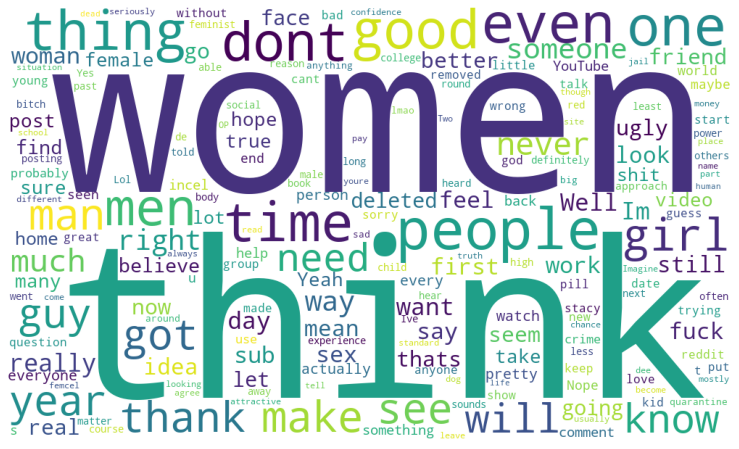

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Limpeza dos caracteres especiais

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import pyspark.sql.functions as f

In [ ]:
dados = dados.withColumn("texto_regex", f.regexp_replace("body", "[\$#,\"!%&'()*+-./:;<=>?@^_`´{|}~\\\\]", ""))

In [ ]:
dados.limit(5).show(truncate=False)

+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|index|body                                                                                                                                                                    |level_1        |texto_regex                                                                                                                                                            |
+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+--------------------------------------------------------------------------------------

In [ ]:
dados = dados.withColumn("texto_limpo", f.trim(dados.texto_regex) )

In [ ]:
dados.limit(2).show()

+-----+--------------------+---------------+--------------------+--------------------+
|index|                body|        level_1|         texto_regex|         texto_limpo|
+-----+--------------------+---------------+--------------------+--------------------+
|    0|Do you have the s...|Nonmisogynistic|Do you have the s...|Do you have the s...|
|    1|Honestly my favor...|Nonmisogynistic|Honestly my favor...|Honestly my favor...|
+-----+--------------------+---------------+--------------------+--------------------+



Tokenização do texto

In [ ]:
from pyspark.ml.feature import Tokenizer

tokenizer = Tokenizer(inputCol = "texto_limpo", outputCol = "tokens")
tokenizado = tokenizer.transform(dados)

In [ ]:
tokenizado.select("texto_limpo", "tokens").show()

+--------------------+--------------------+
|         texto_limpo|              tokens|
+--------------------+--------------------+
|Do you have the s...|[do, you, have, t...|
|Honestly my favor...|[honestly, my, fa...|
|Source Doesnt sou...|[source, doesnt, ...|
|Damn I saw a movi...|[damn, i, saw, a,...|
|Some places have ...|[some, places, ha...|
|So if I drink eno...|[so, if, i, drink...|
|Youll Benjamin Bu...|[youll, benjamin,...|
|Isnt this the plo...|[isnt, this, the,...|
|No idea I watched...|[no, idea, i, wat...|
|In the movie ther...|[in, the, movie, ...|
|One of my friends...|[one, of, my, fri...|
|What kinda Tom Br...|[what, kinda, tom...|
|   Recommended by FF|[recommended, by,...|
|Professionals say...|[professionals, s...|
|      Virgina Spread|   [virgina, spread]|
|I cant believe it...|[i, cant, believe...|
|I hate you becaus...|[i, hate, you, be...|
|Even if you chug ...|[even, if, you, c...|
|Ill need way more...|[ill, need, way, ...|
|I think I have a ...|[i, think,

Contagem dos tokens

In [ ]:
from pyspark.sql.types import IntegerType

In [ ]:
countTokens = f.udf(lambda tokens: len(tokens), IntegerType())
tokenizado.select("texto_limpo", "tokens").withColumn("Freq_tokens", countTokens(f.col("tokens"))).show()

+--------------------+--------------------+-----------+
|         texto_limpo|              tokens|Freq_tokens|
+--------------------+--------------------+-----------+
|Do you have the s...|[do, you, have, t...|         17|
|Honestly my favor...|[honestly, my, fa...|         29|
|Source Doesnt sou...|[source, doesnt, ...|          7|
|Damn I saw a movi...|[damn, i, saw, a,...|         32|
|Some places have ...|[some, places, ha...|         16|
|So if I drink eno...|[so, if, i, drink...|         11|
|Youll Benjamin Bu...|[youll, benjamin,...|          5|
|Isnt this the plo...|[isnt, this, the,...|          6|
|No idea I watched...|[no, idea, i, wat...|         29|
|In the movie ther...|[in, the, movie, ...|         35|
|One of my friends...|[one, of, my, fri...|         38|
|What kinda Tom Br...|[what, kinda, tom...|          7|
|   Recommended by FF|[recommended, by,...|          3|
|Professionals say...|[professionals, s...|         21|
|      Virgina Spread|   [virgina, spread]|     

Retirada das stop words

In [ ]:
#teste (nltk)
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pyspark.ml.feature import StopWordsRemover

stop = StopWordsRemover.loadDefaultStopWords("english")

In [ ]:
from pyspark.ml.feature import Tokenizer

In [ ]:
tokenizer = Tokenizer(inputCol = "texto_limpo", outputCol = "tokens" )
tokenized = tokenizer.transform(dados)


In [ ]:
remover = StopWordsRemover(inputCol = "tokens", outputCol = "texto_final", stopWords= stop)
feature_data = remover.transform(tokenizado)

In [ ]:
feature_data.select("tokens", "texto_final").limit(11).show(truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|tokens                                                                                                                                                                                                                                       |texto_final                                                                                                                                                         |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
countTokens = f.udf(lambda tokens: len(tokens), IntegerType())
tokenizado.select("texto_limpo", "tokens").withColumn("Freq_tokens", countTokens(f.col("tokens"))).show()

+--------------------+--------------------+-----------+
|         texto_limpo|              tokens|Freq_tokens|
+--------------------+--------------------+-----------+
|Do you have the s...|[do, you, have, t...|         17|
|Honestly my favor...|[honestly, my, fa...|         29|
|Source Doesnt sou...|[source, doesnt, ...|          7|
|Damn I saw a movi...|[damn, i, saw, a,...|         32|
|Some places have ...|[some, places, ha...|         16|
|So if I drink eno...|[so, if, i, drink...|         11|
|Youll Benjamin Bu...|[youll, benjamin,...|          5|
|Isnt this the plo...|[isnt, this, the,...|          6|
|No idea I watched...|[no, idea, i, wat...|         29|
|In the movie ther...|[in, the, movie, ...|         35|
|One of my friends...|[one, of, my, fri...|         38|
|What kinda Tom Br...|[what, kinda, tom...|          7|
|   Recommended by FF|[recommended, by,...|          3|
|Professionals say...|[professionals, s...|         21|
|      Virgina Spread|   [virgina, spread]|     

In [ ]:
feature_data.select("tokens", "texto_final")\
          .withColumn("Freq_tokens", countTokens(f.col("tokens")))\
          .withColumn("Freq_tokens_limpos",  countTokens(f.col("texto_final"))).show()

+--------------------+--------------------+-----------+------------------+
|              tokens|         texto_final|Freq_tokens|Freq_tokens_limpos|
+--------------------+--------------------+-----------+------------------+
|[do, you, have, t...|[skin, 80, year, ...|         17|                 8|
|[honestly, my, fa...|[honestly, favori...|         29|                15|
|[source, doesnt, ...|[source, doesnt, ...|          7|                 5|
|[damn, i, saw, a,...|[damn, saw, movie...|         32|                14|
|[some, places, ha...|[places, poor, wa...|         16|                11|
|[so, if, i, drink...|[drink, enough, w...|         11|                 5|
|[youll, benjamin,...|[youll, benjamin,...|          5|                 4|
|[isnt, this, the,...|[isnt, plot, cocoon]|          6|                 3|
|[no, idea, i, wat...|[idea, watched, m...|         29|                12|
|[in, the, movie, ...|[movie, group, el...|         35|                15|
|[one, of, my, fri...|[on

In [ ]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="texto_final", outputCol="CountVec")
model = cv.fit(feature_data)
countVectorizer_features = model.transform(feature_data)

countVectorizer_features.select('texto_final','CountVec').limit(5).show()#truncate=False

+--------------------+--------------------+
|         texto_final|            CountVec|
+--------------------+--------------------+
|[skin, 80, year, ...|(9929,[173,190,36...|
|[honestly, favori...|(9929,[27,31,37,2...|
|[source, doesnt, ...|(9929,[32,48,510,...|
|[damn, saw, movie...|(9929,[1,9,25,161...|
|[places, poor, wa...|(9929,[134,167,36...|
+--------------------+--------------------+



In [ ]:
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="texto_final", outputCol="hashingTF")
hashingTF.setNumFeatures(1000)

HTFfeaturizedData = hashingTF.transform(countVectorizer_features)




In [ ]:
HTFfeaturizedData.select("texto_final", "hashingTF").limit(5).show()

+--------------------+--------------------+
|         texto_final|           hashingTF|
+--------------------+--------------------+
|[skin, 80, year, ...|(1000,[83,292,343...|
|[honestly, favori...|(1000,[74,86,115,...|
|[source, doesnt, ...|(1000,[166,721,79...|
|[damn, saw, movie...|(1000,[83,129,162...|
|[places, poor, wa...|(1000,[103,160,19...|
+--------------------+--------------------+



In [ ]:
from pyspark.ml.feature import IDF
idf = IDF(inputCol="hashingTF", outputCol="features")
idfModel = idf.fit(HTFfeaturizedData)
TFIDFfeaturizedData = idfModel.transform(HTFfeaturizedData)


In [ ]:
TFIDFfeaturizedData.select('texto_final', 'features').limit(5).show(truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|texto_final                                                                                                                     |features                                                                                                                                                                                                                                                                                                                                             |
+-----------------------------------------------------

In [ ]:
TFIDFfeaturizedData.groupBy('level_1').count().show()

+--------------------+-----+
|             level_1|count|
+--------------------+-----+
| which they would...|    1|
| feel BIGGER than...|    1|
|           (5, 2, 1)|    1|
|             (27, 3)|    1|
|                   8|    1|
|My primary slave ...|    1|
| BLS and some of ...|    1|
|Sexual_or_physica...|    3|
| I KNEW that I wa...|    1|
| you'll be abused...|    1|
|So of course she ...|    1|
|           Hypergamy|    1|
|               Stacy|    1|
| instilling certa...|    1|
| thin with a bit ...|    5|
|I have even had g...|    1|
| I didn't take my...|    1|
|               sluts|    2|
|Luckily, feminist...|    1|
|           (3, 1, 1)|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import StringIndexer

stringindexer = StringIndexer(inputCol="level_1", outputCol="label")
dados = stringindexer.fit(dados).transform(dados)

In [ ]:
dados.groupBy(['level_1','label']).count().show()

+--------------------+-----+-----+
|             level_1|label|count|
+--------------------+-----+-----+
|             beckies| 69.0|    1|
|               becky| 70.0|    1|
|Luckily, feminist...| 62.0|    1|
|So of course she ...| 66.0|    1|
|                (8,)| 53.0|    1|
|     Nonmisogynistic|  0.0| 4246|
|Nature of the abu...|  7.0|    4|
|             (47, 6)| 15.0|    2|
|          (55, 4, 1)| 48.0|    1|
|*‚ÄúYou just remi...| 55.0|    1|
|           Hypergamy| 18.0|    1|
|             (10, 4)| 42.0|    1|
|Women do not like...| 68.0|    1|
| but normies have...| 25.0|    1|
|I vet them and th...| 60.0|    1|
| to escalate and ...| 37.0|    1|
|women are likely ...| 77.0|    1|
|                test|  2.0|  112|
|                   8| 57.0|    1|
|   The Rational Male|  8.0|    3|
+--------------------+-----+-----+
only showing top 20 rows



Definição dos dados de treino(train) e teste(test)

In [ ]:
train, test = dados.randomSplit([0.7, 0.3], seed = 101)

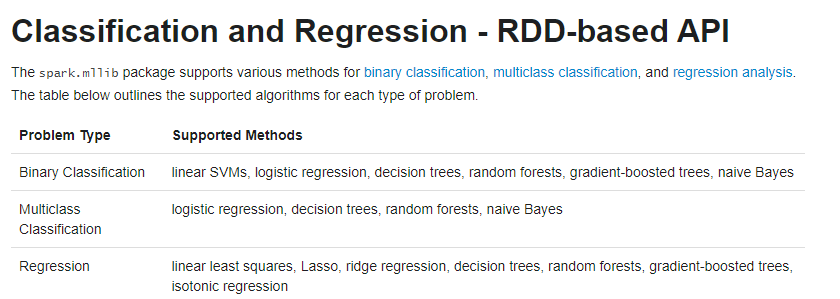

https://spark.apache.org/docs/2.2.0/mllib-classification-regression.html

Árvore de Decisão

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier

tokenizer = Tokenizer(inputCol="texto_limpo", outputCol="tokens")
stopwords = StopWordsRemover(inputCol="tokens", outputCol="texto_final")
hashingTF = HashingTF(inputCol=stopwords.getOutputCol(), outputCol="HTF", numFeatures=1000)
tfidf = IDF(inputCol="HTF", outputCol="features")
dt = DecisionTreeClassifier(featuresCol='features', labelCol='label', maxDepth=10)

pipeline_arvore = Pipeline(stages = [tokenizer,stopwords, hashingTF, tfidf, dt])

In [ ]:
dados_transformados = pipeline_arvore.fit(dados).transform(dados)
dados_transformados.limit(5).show()

+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|index|                body|        level_1|         texto_regex|         texto_limpo|label|              tokens|         texto_final|                 HTF|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    0|Do you have the s...|Nonmisogynistic|Do you have the s...|Do you have the s...|  0.0|[do, you, have, t...|[skin, 80, year, ...|(1000,[83,292,343...|(1000,[83,292,343...|[3648.0,126.0,33....|[0.93875450334534...|       0.0|
|    1|Honestly my favor...|Nonmisogynistic|Honestly my favor...|Honestly my fav

In [ ]:
dt_model_treino = pipeline_arvore.fit(train)
predictions_treino_arvore = dt_model_treino.transform(train)

In [ ]:
dt_model_teste = pipeline_arvore.fit(test)
predictions_teste_arvore = dt_model_teste.transform(test)

In [ ]:
predictions_teste_arvore.show()

+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|index|                body|        level_1|         texto_regex|         texto_limpo|label|              tokens|         texto_final|                 HTF|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    4|Some places have ...|Nonmisogynistic|Some places have ...|Some places have ...|  0.0|[some, places, ha...|[places, poor, wa...|(1000,[103,160,19...|(1000,[103,160,19...|[1112.0,39.0,15.0...|[0.93681550126369...|       0.0|
|    5|So if I drink eno...|Nonmisogynistic|So if I drink eno...|So if I drink e

In [ ]:
predictions_teste_arvore.select(['label','prediction']).show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')

In [ ]:
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'fMeasureByLabel'}))

Acuracia = 0.929972
Precisão = 0.928152
Recall = 0.998423
F1 = 0.962006


Random Forest

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

tokenizer = Tokenizer(inputCol="texto_limpo", outputCol="tokens")
stopwords = StopWordsRemover(inputCol="tokens", outputCol="texto_final")
hashingTF = HashingTF(inputCol=stopwords.getOutputCol(), outputCol="HTF", numFeatures=1000)
tfidf = IDF(inputCol="HTF", outputCol="features")
rfr = RandomForestRegressor(featuresCol='features', labelCol='label', maxDepth=10, numTrees=10)

pipeline_randomforest = Pipeline(stages=[tokenizer, stopwords, hashingTF, tfidf, rfr])



In [ ]:
rfr_model_treino = pipeline_randomforest.fit(train)
predictions_treino_ranomforest = rfr_model_treino.transform(train)

In [ ]:
rfr_model_teste = pipeline_randomforest.fit(test)
predictions_teste_randomforest = rfr_model_teste.transform(test)

In [ ]:
predictions_teste_randomforest.show()

+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+-------------------+
|index|                body|        level_1|         texto_regex|         texto_limpo|label|              tokens|         texto_final|                 HTF|            features|         prediction|
+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+-------------------+
|    4|Some places have ...|Nonmisogynistic|Some places have ...|Some places have ...|  0.0|[some, places, ha...|[places, poor, wa...|(1000,[103,160,19...|(1000,[103,160,19...|0.12452731004123077|
|    5|So if I drink eno...|Nonmisogynistic|So if I drink eno...|So if I drink eno...|  0.0|[so, if, i, drink...|[drink, enough, w...|(1000,[292,348,58...|(1000,[292,348,58...| 0.1535413874670729|
|   14|     Vir

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')

In [ ]:
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'fMeasureByLabel'}))

Acuracia = 0.000700
Precisão = 1.000000
Recall = 0.000789
F1 = 0.001576


Regressão Logistica

In [ ]:
from pyspark.ml.classification import LogisticRegression

tokenizer = Tokenizer(inputCol="texto_limpo", outputCol="tokens")
stopwords = StopWordsRemover(inputCol="tokens", outputCol="texto_final")
hashingTF = HashingTF(inputCol=stopwords.getOutputCol(), outputCol="HTF", numFeatures=1000)
tfidf = IDF(inputCol="HTF", outputCol="features")
lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=10, regParam=0.001)

pipeline_logisticregression = Pipeline(stages=[tokenizer, stopwords, hashingTF, tfidf, lr])



In [ ]:
lr_model_treino = pipeline_logisticregression.fit(train)
predictions_treino_logisticregression = lr_model_treino.transform(train)

In [ ]:
lr_model_teste = pipeline_logisticregression.fit(test)
predictions_teste_logisticregression = lr_model_teste.transform(test)

In [ ]:
predictions_teste_logisticregression.show()

+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|index|                body|        level_1|         texto_regex|         texto_limpo|label|              tokens|         texto_final|                 HTF|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    4|Some places have ...|Nonmisogynistic|Some places have ...|Some places have ...|  0.0|[some, places, ha...|[places, poor, wa...|(1000,[103,160,19...|(1000,[103,160,19...|[14.6861920172931...|[0.99996502612838...|       0.0|
|    5|So if I drink eno...|Nonmisogynistic|So if I drink eno...|So if I drink e

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')

In [ ]:
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'fMeasureByLabel'}))

Acuracia = 0.992997
Precisão = 0.996072
Recall = 1.000000
F1 = 0.998032


In [ ]:
y_true = predictions_teste_logisticregression.select(['label']).collect()
y_pred = predictions_teste_logisticregression.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))

In [ ]:
y_true = predictions_teste_logisticregression.select(['label']).collect()
y_pred = predictions_teste_logisticregression.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1268
         1.0       1.00      0.99      0.99        95
         2.0       0.88      0.95      0.91        38
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         1
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         2
        16.0       0.00      0.00      0.00         1
        18.0       1.00      1.00      1.00         1
        23.0       1.00      1.00      1.00         1
        24.0       1.00      1.00      1.00         1
        26.0       1.00      1.00      1.00         1
        29.0       1.00      1.00      1.00         1
        40.0       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes


In [ ]:
from pyspark.ml.classification import NaiveBayes

tokenizer = Tokenizer(inputCol="texto_limpo", outputCol="tokens")
stopwords = StopWordsRemover(inputCol="tokens", outputCol="texto_final")
hashingTF = HashingTF(inputCol=stopwords.getOutputCol(), outputCol="HTF", numFeatures=1000)
tfidf = IDF(inputCol="HTF", outputCol="features")
nb = NaiveBayes(featuresCol='features', labelCol='label', smoothing=1.0, modelType="multinomial")

pipeline_naive = Pipeline(stages=[tokenizer, stopwords, hashingTF, tfidf,nb])

In [ ]:
naive_model_treino = pipeline_naive.fit(train)
predictions_treino_naive = naive_model_treino.transform(train)

In [ ]:
naive_model_teste = pipeline_naive.fit(test)
predictions_teste_naive = naive_model_teste.transform(test)

In [ ]:
predictions_teste_naive.show()

+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|index|                body|        level_1|         texto_regex|         texto_limpo|label|              tokens|         texto_final|                 HTF|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+---------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    4|Some places have ...|Nonmisogynistic|Some places have ...|Some places have ...|  0.0|[some, places, ha...|[places, poor, wa...|(1000,[103,160,19...|(1000,[103,160,19...|[-354.81686500356...|[0.87968389819137...|       0.0|
|    5|So if I drink eno...|Nonmisogynistic|So if I drink eno...|So if I drink e

In [ ]:
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'fMeasureByLabel'}))

Acuracia = 0.815126
Precisão = 0.990431
Recall = 0.816246
F1 = 0.894942


Continuação utilizando Scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/TCC_BANCOS/online-misogyny-eacl2021-main/data/final_labels.csv")

In [ ]:
dataset=dataset[['body','level_1']]
dataset.head()

,body,level_1
0,Do you have the skin of a 80 year old grandma?...,Nonmisogynistic
1,This is taking a grain of truth and extrapolat...,Nonmisogynistic
2,Honestly my favorite thing about this is that ...,Nonmisogynistic
3,Source? Doesnt sound right to me idk,Nonmisogynistic
4,"Damn, I saw a movie in which the old woman bat...",Misogynistic


In [ ]:
dataset.isnull().sum()

body       12
level_1     0
dtype: int64

In [ ]:

dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

body       0
level_1    0
dtype: int64

In [ ]:
dataset.dtypes

body       object
level_1    object
dtype: object

In [ ]:
dataset.groupby('level_1')['level_1'].count()

level_1
Misogynistic        699
Nonmisogynistic    5856
Name: level_1, dtype: int64

In [ ]:
dataset['body'] = dataset['body'].astype(str)

In [ ]:
a_trocar = {
    'Nonmisogynistic': 0,
    'Misogynistic': 1
}
dataset.level_1 = dataset.level_1.map(a_trocar)
dataset.head()

,body,level_1
0,Do you have the skin of a 80 year old grandma?...,0
1,This is taking a grain of truth and extrapolat...,0
2,Honestly my favorite thing about this is that ...,0
3,Source? Doesnt sound right to me idk,0
4,"Damn, I saw a movie in which the old woman bat...",1


In [ ]:
class TColumns(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):

    dataset = X.copy()
    dataset['body'] = dataset['body'].str.replace('[,.:;!?]+', ' ', regex=True).copy()
    dataset['body'] = dataset['body'].str.replace('[/<>()|\+\-\$%&#@\'\"]+', ' ', regex=True).copy()
    dataset['body'] = dataset['body'].str.replace('[0-9]+', '', regex=True)

    return dataset.body

KNN (K-nearest neighbours)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
tco = TColumns()
 
cvt = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words=stop)
 
tfi = TfidfTransformer(use_idf=True)
 
knn = KNeighborsClassifier(n_neighbors=3)
 
knn_pipeline = Pipeline(steps=[('Transformer', tco),
                              ('CountVectorizer', cvt),
                              ('TfidfTransformer', tfi),
                              ('Model', knn)])

In [ ]:
entrada = dataset[['body']]
saida = dataset['level_1']
X_train, X_test, y_train, y_test = train_test_split(entrada, 
                                                    saida, 
                                                    test_size=0.3)
knn_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


Pipeline(steps=[('Transformer', TColumns()),
                ('CountVectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             'your', 'yours', 'yourself',
                                             'yourselves', 'he', 'him', 'his',
                                             'himself', 'she', 'her', 'hers',
                                             'herself', 'it', 'its', 'itself',
                                             'they', 'them', 'their', 'theirs',
                                             'themselves', 'what', ...],
                                 strip_accents='ascii')),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
predictions_teste_knn = knn_pipeline.predict(X_test)

In [ ]:
print("Acurácia: {}".format(metrics.accuracy_score(y_test, predictions_teste_knn)))
print("Precision: {}".format(metrics.precision_score(y_test, predictions_teste_knn)))
print("Recall: {}".format(metrics.recall_score(y_test, predictions_teste_knn)))
print("F1: {}".format(metrics.f1_score(y_test, predictions_teste_knn)))

Acurácia: 0.9201830198271479
Precision: 0.972972972972973
Recall: 0.1875
F1: 0.314410480349345


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

SVM (Support Vector Machine)




In [ ]:
from sklearn import svm

In [ ]:
tco = TColumns()
 
cvt = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words=stop)
 
tfi = TfidfTransformer(use_idf=True)
 
svm = svm.SVC()
 
svm_pipeline = Pipeline(steps=[('Transformer', tco),
                              ('CountVectorizer', cvt),
                              ('TfidfTransformer', tfi),
                              ('Model', svm)])

In [ ]:
entrada = dataset[['body']]
saida = dataset['level_1']
X_train, X_test, y_train, y_test = train_test_split(entrada, 
                                                    saida, 
                                                    test_size=0.3)
svm_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


Pipeline(steps=[('Transformer', TColumns()),
                ('CountVectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             'your', 'yours', 'yourself',
                                             'yourselves', 'he', 'him', 'his',
                                             'himself', 'she', 'her', 'hers',
                                             'herself', 'it', 'its', 'itself',
                                             'they', 'them', 'their', 'theirs',
                                             'themselves', 'what', ...],
                                 strip_accents='ascii')),
                ('TfidfTransformer', TfidfTransformer()), ('Model', SVC())])

In [ ]:
predictions_teste_svm = knn_pipeline.predict(X_test)

In [ ]:
print("Acurácia: {}".format(metrics.accuracy_score(y_test, predictions_teste_svm)))
print("Precision: {}".format(metrics.precision_score(y_test, predictions_teste_svm)))
print("Recall: {}".format(metrics.recall_score(y_test, predictions_teste_svm)))
print("F1: {}".format(metrics.f1_score(y_test, predictions_teste_svm)))

Acurácia: 0.9344178952719878
Precision: 0.9733333333333334
Recall: 0.365
F1: 0.5309090909090909


BERT (unweighted)

BERT (weighted)

Tabela de resultado de cada modelo

In [ ]:


print("====================================")
print("Árvore de Decisão")
print("====================================")
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_arvore, {evaluator.metricName:'fMeasureByLabel'}))

print("====================================")
print("Random Forest")
print("====================================")
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_randomforest, {evaluator.metricName:'fMeasureByLabel'}))

print("====================================")
print("Regressão Logistica")
print("====================================")
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_logisticregression, {evaluator.metricName:'fMeasureByLabel'}))

print("====================================")
print("Naive Bayes")
print("====================================")
print("Acuracia = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'accuracy'}))
print("Precisão = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'precisionByLabel'}))
print("Recall = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'recallByLabel'}))
print("F1 = %f" % evaluator.evaluate(predictions_teste_naive, {evaluator.metricName:'fMeasureByLabel'}))


print("====================================")
print("KNN")
print("====================================")
print("Acurácia: {}".format(metrics.accuracy_score(y_test, predictions_teste_knn)))
print("Precision: {}".format(metrics.precision_score(y_test, predictions_teste_knn)))
print("Recall: {}".format(metrics.recall_score(y_test, predictions_teste_knn)))
print("F1: {}".format(metrics.f1_score(y_test, predictions_teste_knn)))


print("====================================")
print("SVM")
print("====================================")
print("Acurácia: {}".format(metrics.accuracy_score(y_test, predictions_teste_svm)))
print("Precision: {}".format(metrics.precision_score(y_test, predictions_teste_svm)))
print("Recall: {}".format(metrics.recall_score(y_test, predictions_teste_svm)))
print("F1: {}".format(metrics.f1_score(y_test, predictions_teste_svm)))
print("====================================")

Árvore de Decisão
Acuracia = 0.929972
Precisão = 0.928152
Recall = 0.998423
F1 = 0.962006
Random Forest
Acuracia = 0.000700
Precisão = 1.000000
Recall = 0.000789
F1 = 0.001576
Regressão Logistica
Acuracia = 0.992997
Precisão = 0.996072
Recall = 1.000000
F1 = 0.998032
Naive Bayes
Acuracia = 0.815126
Precisão = 0.990431
Recall = 0.816246
F1 = 0.894942
KNN
Acurácia: 0.8805287239450941
Precision: 0.02702702702702703
Recall: 0.005
F1: 0.008438818565400845
SVM
Acurácia: 0.9344178952719878
Precision: 0.9733333333333334
Recall: 0.365
F1: 0.5309090909090909
